<a href="https://colab.research.google.com/github/uditsevak/Udit_GDG_Tasks/blob/NLP_Task2/Udit_GDG_NLP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **NLP Task 2**

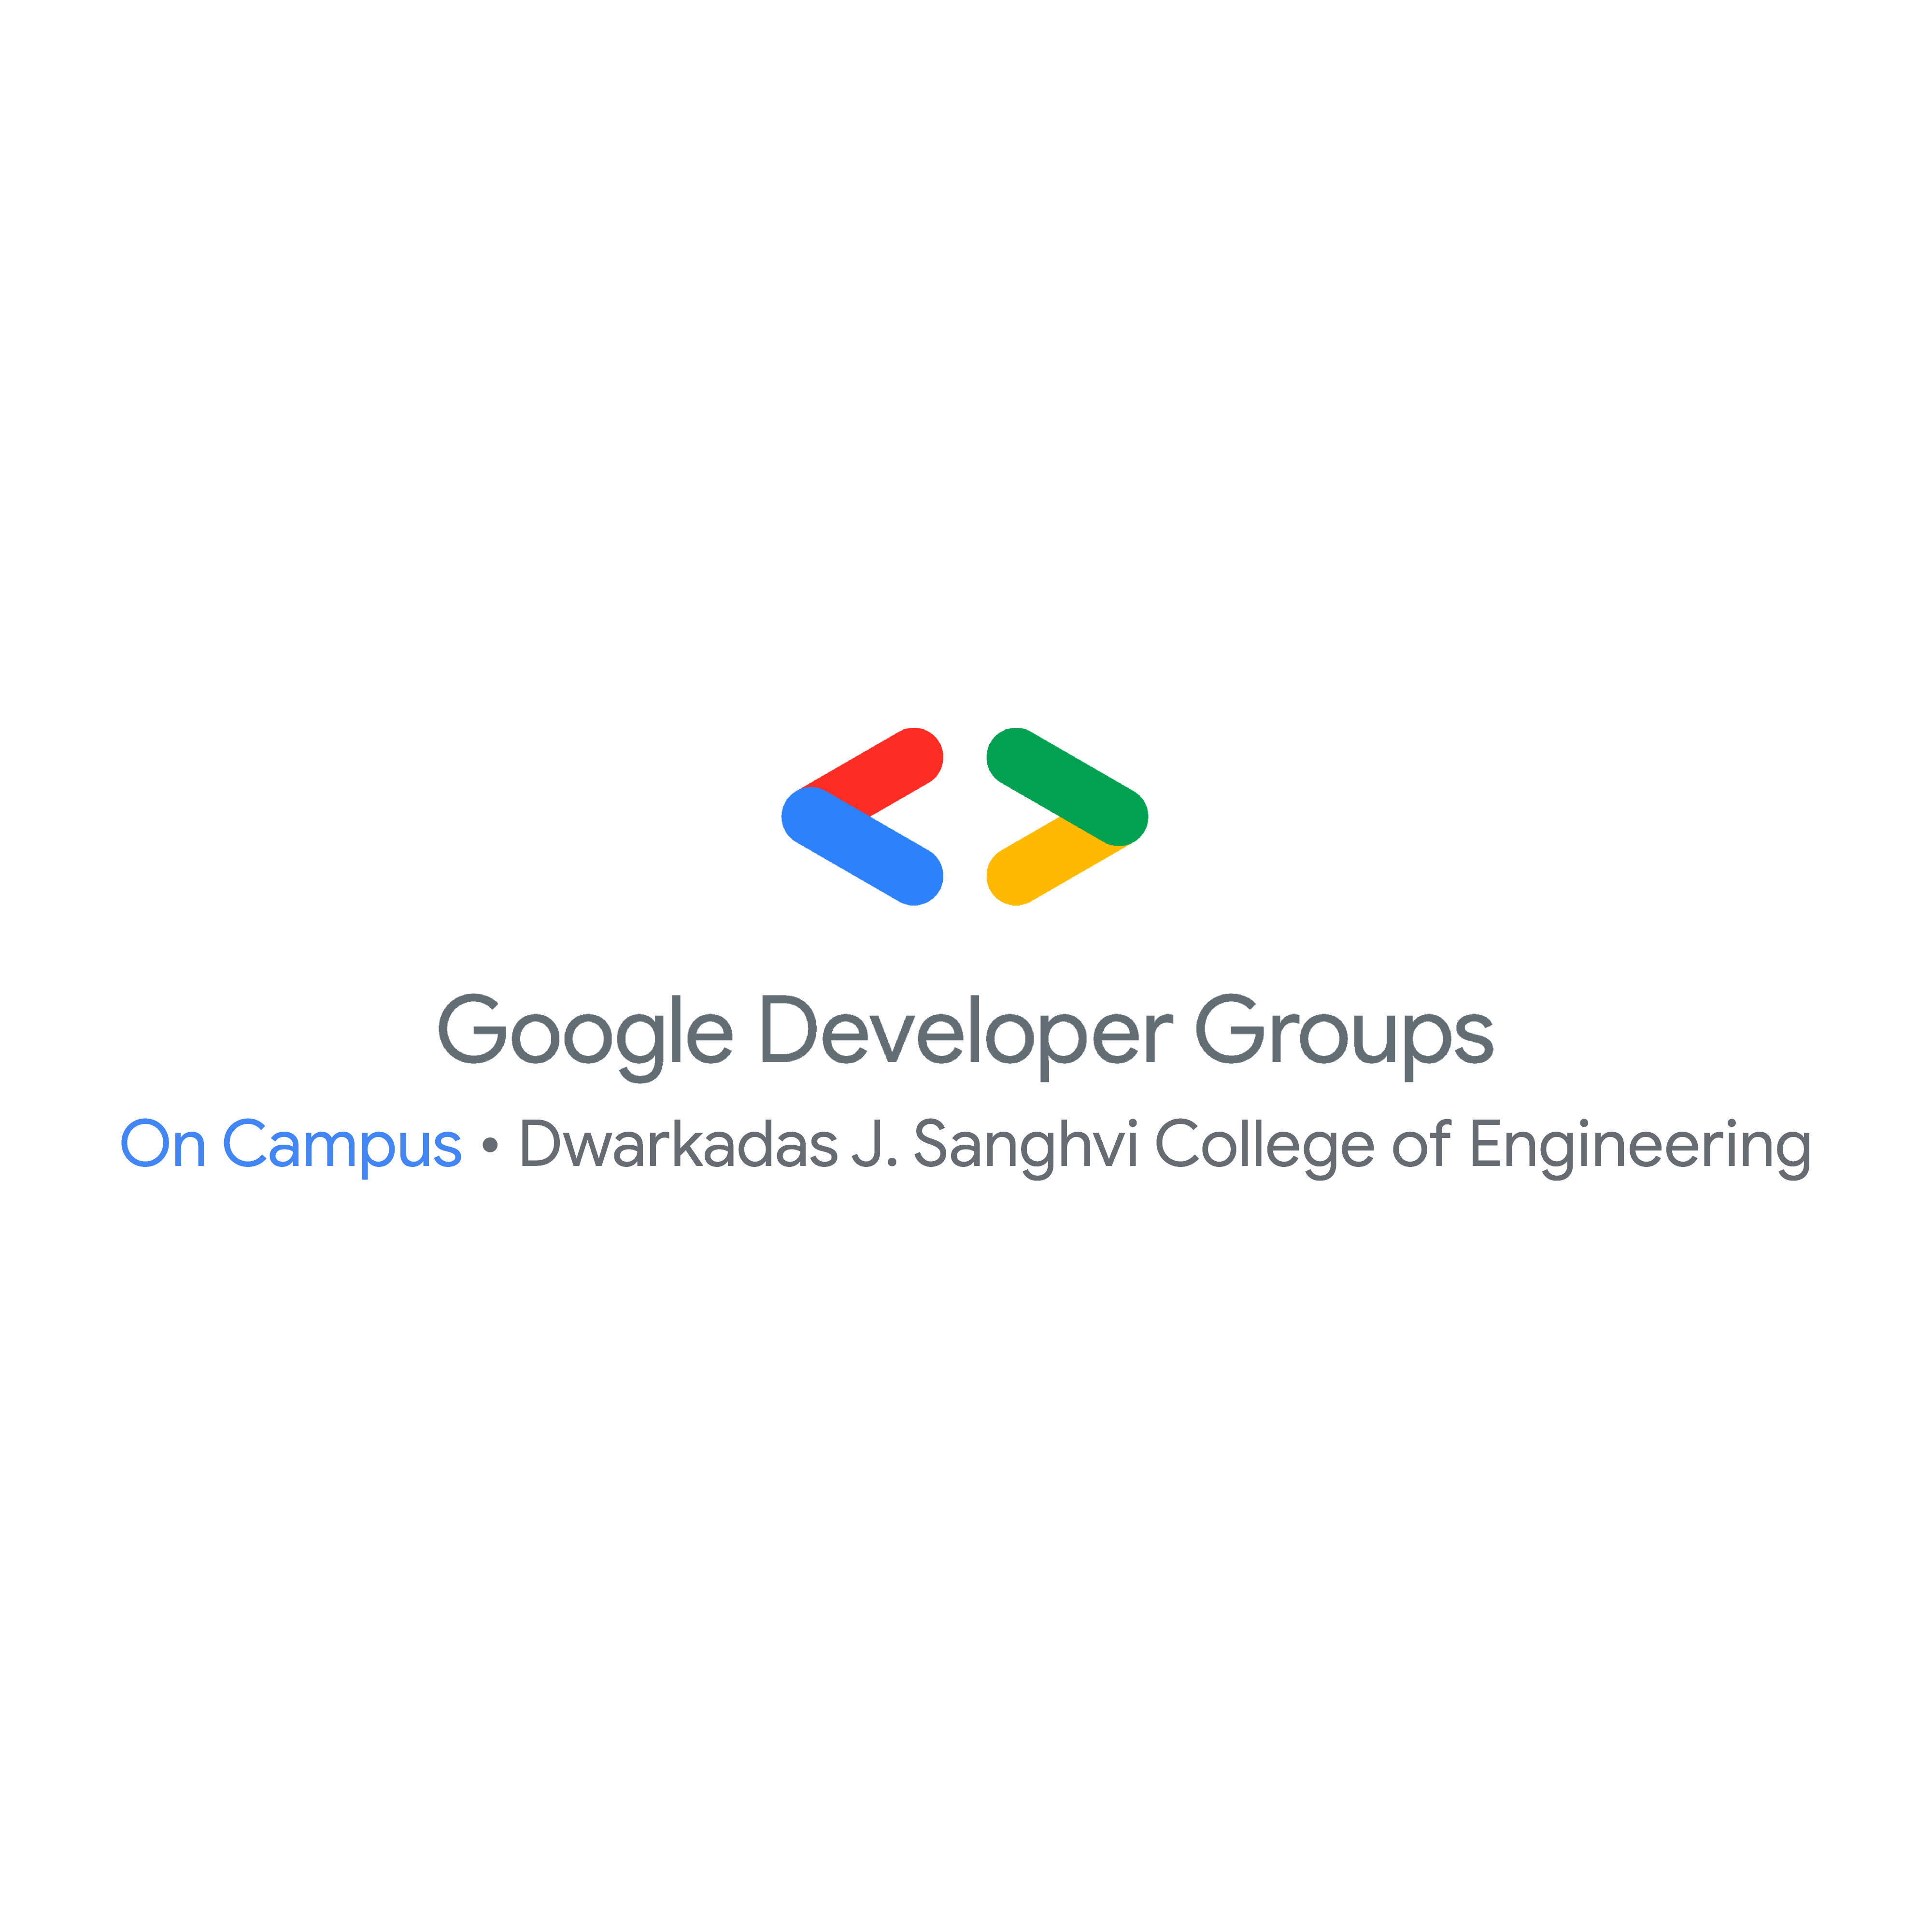

Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Load the IMDB dataset again
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]

In [6]:
import re
import nltk
from nltk.corpus import stopwords

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize
nltk.download('punkt_tab')

lem = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
# Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
def text_transform(df):
    corpus = []
    stop_words = set(stopwords.words('english'))

    for review in df:
        review_tokens = []
        sentences = nltk.sent_tokenize(review)

        for sentence in sentences:

            clean_sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

            clean_sentence = clean_sentence.lower()

            words = word_tokenize(clean_sentence)

            lemmatized_words = [
                lem.lemmatize(word) for word in words if word not in stop_words and word.isalpha()
            ]

            review_tokens.extend(lemmatized_words)


        corpus.append(review_tokens)

    return corpus


corpus = text_transform(df['review'])

In [11]:
corpus[:1]

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'mebr',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordbr',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'moreso',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'f

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [12]:
#Find vocabulary count of your corpus
#code
vocabulary = []

for document in corpus:
    for word in document:
        vocabulary.append(word)

all_words = [word for review in corpus for word in review]
vocabulary = len(all_words)
print("total words:",vocabulary)

vocabulary = set(all_words)

vocabulary_count = len(vocabulary)
print("vocabulary size:",vocabulary_count)

total words: 608383
vocabulary size: 45683


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [13]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep
OH_rep = []
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 5000

corpus_as_strings = [" ".join(review) for review in corpus]

OH_rep = [one_hot(review, vocab_size) for review in corpus_as_strings]

print("One-Hot Representation (First Review):", OH_rep[0])

One-Hot Representation (First Review): [3166, 3021, 1248, 1418, 1662, 1020, 63, 2755, 504, 48, 2060, 4374, 4375, 1911, 3759, 4350, 1662, 3662, 3944, 4924, 3387, 2967, 504, 2234, 1815, 3948, 4180, 1213, 3093, 3183, 4180, 4448, 4326, 611, 4962, 3455, 3387, 1420, 1931, 1006, 713, 4375, 3232, 1662, 3319, 2192, 2035, 252, 1950, 3596, 1991, 2088, 432, 2601, 1244, 671, 2898, 537, 3496, 4266, 4476, 1360, 4612, 863, 268, 3512, 631, 1244, 2017, 4197, 4618, 2991, 2066, 1982, 4893, 1216, 2876, 3404, 3802, 2644, 1307, 1449, 4092, 1061, 947, 1903, 3762, 4375, 1590, 1230, 101, 3413, 4180, 870, 1986, 1815, 4180, 2787, 984, 2884, 2145, 1214, 1090, 2097, 3811, 2884, 4500, 2884, 996, 4821, 811, 2934, 1911, 1020, 1929, 3341, 4350, 1951, 2257, 3199, 1230, 3382, 3732, 2054, 287, 1662, 2851, 4493, 268, 2309, 3847, 3387, 3387, 1378, 592, 2847, 268, 4141, 2619, 3951, 268, 2053, 1587, 680, 4928, 3592, 1896, 693, 4451, 3951, 4844, 537, 3499, 870, 3018, 2209, 4568, 537, 4250, 1418, 1662, 2398, 3833, 1718, 711, 31

In [14]:
len(OH_rep)

5000

In [15]:
# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max(len(sentence) for sentence in OH_rep)

max_length += 5

pre_pad = pad_sequences(OH_rep, maxlen=max_length, padding='pre')

print(pre_pad[0])
print("----------------------------------------------------------------------")

post_pad = pad_sequences(OH_rep, maxlen=max_length, padding='post')

print(post_pad[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [16]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values
        self.embedding_matrix = self.add_weight(name="embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):
        # Map integer indices to embedding vectors
        inputs = tf.cast(inputs, tf.int32)
        return tf.nn.embedding_lookup(self.embedding_matrix, inputs)


In [17]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim= 10

In [18]:
# Create a sequential model with the custom embedding layer along with the appropriate vocabulary size and the decided dimension size.
# Remember to add a Flatten layer to convert the input from 3D to 2D, and a final Dense layer.
model = tf.keras.Sequential([

    CustomEmbeddingLayer(vocab_size=vocab_size, embed_dim=dim),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, max_length))

In [19]:
#Compile the model with optimizer adam and loss mse
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_embedding_layer               │ (None, 940, 10)             │          50,000 │
│ (CustomEmbeddingLayer)               │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           9,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,401 (232.04 KB)

 Trainable params: 59,401 (232.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

In [21]:
#Split the dataset into train,test dataset
from sklearn.model_selection import train_test_split
X = pre_pad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [22]:
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
118/118 - 2s - 19ms/step - accuracy: 0.4984 - loss: 0.2518
Epoch 2/10
118/118 - 1s - 10ms/step - accuracy: 0.7603 - loss: 0.2323
Epoch 3/10
118/118 - 1s - 10ms/step - accuracy: 0.8811 - loss: 0.1685
Epoch 4/10
118/118 - 1s - 8ms/step - accuracy: 0.9269 - loss: 0.1026
Epoch 5/10
118/118 - 1s - 5ms/step - accuracy: 0.9595 - loss: 0.0646
Epoch 6/10
118/118 - 1s - 5ms/step - accuracy: 0.9813 - loss: 0.0424
Epoch 7/10
118/118 - 1s - 5ms/step - accuracy: 0.9899 - loss: 0.0283
Epoch 8/10
118/118 - 1s - 5ms/step - accuracy: 0.9947 - loss: 0.0191
Epoch 9/10
118/118 - 1s - 10ms/step - accuracy: 0.9987 - loss: 0.0133
Epoch 10/10
118/118 - 1s - 5ms/step - accuracy: 0.9992 - loss: 0.0096


In [ ]:
model.evaluate(X_test,y_test,verbose=2)

47/47 - 0s - loss: 0.2549 - accuracy: 0.5227 - 456ms/epoch - 10ms/step


[0.25491079688072205, 0.5226666927337646]

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

LSTMs (Long Short-Term Memory networks) are pretty good at text generation because they’re designed to remember important information from earlier in a sequence while also forgetting stuff that isn’t as relevant. This is super useful when generating text because the model needs to keep track of what’s been said before so that the next word it predicts actually makes sense.

Now, the magic of LSTMs comes from their special architecture—those little “gates” (input, forget, and output gates) that help decide what information to keep and what to toss. Unlike a vanilla RNN, which kind of sucks at remembering things over long sequences (because of vanishing gradients and all that), an LSTM can hold onto key details for much longer.

So when you give an LSTM a prompt, it doesn’t just blindly predict the next word based on the last one—it considers a much broader context, making the text feel more coherent and meaningful. That’s why it works so well for tasks like autocomplete, writing assistance, and even generating entire articles or stories!

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [26]:
# Load your text data
file_path = '/content/gdrive/MyDrive/aliceinwonderland.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [27]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(text.split("\n"))

tokenized_text = tokenizer.texts_to_sequences(text)

vocabulary = len(tokenizer.word_index) + 1

print("Tokenized Text:", tokenized_text)
print("Word Index:", tokenizer.word_index)
print("Vocabulary Size:", vocabulary)


Tokenized Text: [[6], [1], [15], [1], [1], [325], [1], [], [6], [1915], [1139], [1], [1], [2895], [1], [1], [1], [1], [], [15], [1], [], [1], [1788], [1], [1915], [1], [1], [1], [6], [1], [1915], [], [], [1], [1], [], [1], [1], [1], [15], [1], [], [1], [6], [1], [1], [1788], [1], [1], [], [], [2895], [1], [1], [], [1485], [15], [1], [1], [1], [1], [1], [15], [1], [1485], [], [1], [1], [1], [1], [1], [1], [1485], [], [1], [1915], [15], [2895], [15], [1788], [1], [], [1600], [], [1601], [], [], [1], [1788], [1], [2895], [1], [1], [2895], [1], [], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [], [], [], [], [], [], [1915], [1788], [1], [1], [], [2895], [1], [1], [], [1], [6], [1], [1], [15], [2895], [], [1], [1788], [1], [1], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [15], [], [], [], [], [], [2895], [1], [1], [], [2829], [1788], [1788], [1], [], [1788], [1], [], [2895], [1], [6], [1], [1], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [15], [15

Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

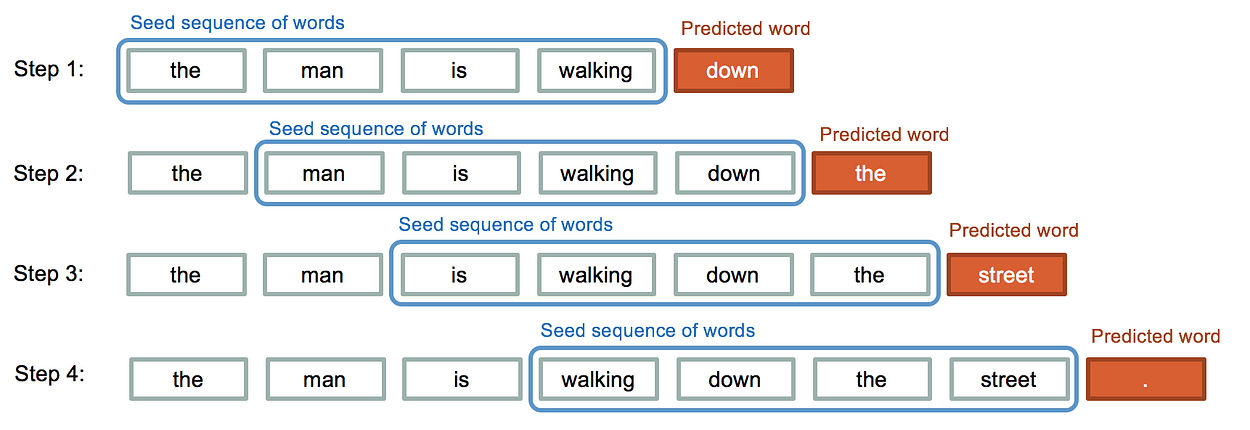

In [28]:
# Convert text to sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    if len(token_list) == 0:
        continue

    for i in range(1, len(token_list) + 1):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)


print("Generated Input Sequences:")
print(input_sequences)


Generated Input Sequences:
[[289], [289, 563], [289, 563, 12], [289, 563, 12, 877], [71], [71, 1595], [71, 1595, 1596], [2], [2, 1597], [2, 1597, 1598], [2, 1597, 1598, 1599], [2, 1597, 1598, 1599, 1600], [2, 1597, 1598, 1599, 1600, 1601], [1602], [177], [177, 15], [177, 15, 36], [177, 15, 36, 2], [177, 15, 36, 2, 89], [177, 15, 36, 2, 89, 630], [177], [177, 1135], [177, 1135, 2], [177, 1135, 2, 349], [177, 1135, 2, 349, 8], [177, 1135, 2, 349, 8, 317], [177], [177, 1136], [177, 1136, 6], [177, 1136, 6, 732], [177, 1136, 6, 732, 498], [177, 1136, 6, 732, 498, 4], [177, 1136, 6, 732, 498, 4, 6], [177, 1136, 6, 732, 498, 4, 6, 132], [177, 1136, 6, 732, 498, 4, 6, 132, 631], [177], [177, 1137], [177, 1137, 2], [177, 1137, 2, 89], [177, 1137, 2, 89, 1138], [177, 1137, 2, 89, 1138, 12], [177, 1137, 2, 89, 1138, 12, 6], [177, 1137, 2, 89, 1138, 12, 6, 30], [177, 1137, 2, 89, 1138, 12, 6, 30, 290], [177], [177, 1139], [177, 1139, 878], [177, 1139, 878, 129], [177, 1139, 878, 129, 6], [177, 11

The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [29]:
# Pad sequences for equal length
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [30]:
# Create predictors and labels
from tensorflow.keras.utils import to_categorical

# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary)


In [31]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocabulary_size = len(tokenizer.word_index) + 1
embedding_dim = 50
input_length = X.shape[1]
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=embedding_dim),

    LSTM(units=100, return_sequences=False),

    Dense(units=vocabulary_size, activation='softmax')
])
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(X, y, epochs=30,verbose=2) # increase the number of epochs for better accuracy, decrease for reducing time

Epoch 1/30
868/868 - 23s - 27ms/step - accuracy: 0.1124 - loss: 3.1264e-04
Epoch 2/30
868/868 - 38s - 44ms/step - accuracy: 0.1167 - loss: 3.1130e-04
Epoch 3/30
868/868 - 23s - 26ms/step - accuracy: 0.1218 - loss: 3.0983e-04
Epoch 4/30
868/868 - 21s - 24ms/step - accuracy: 0.1286 - loss: 3.0806e-04
Epoch 5/30
868/868 - 42s - 49ms/step - accuracy: 0.1340 - loss: 3.0634e-04
Epoch 6/30
868/868 - 40s - 46ms/step - accuracy: 0.1396 - loss: 3.0436e-04
Epoch 7/30
868/868 - 22s - 25ms/step - accuracy: 0.1459 - loss: 3.0266e-04
Epoch 8/30
868/868 - 42s - 49ms/step - accuracy: 0.1507 - loss: 3.0082e-04
Epoch 9/30
868/868 - 21s - 24ms/step - accuracy: 0.1561 - loss: 2.9935e-04
Epoch 10/30
868/868 - 20s - 24ms/step - accuracy: 0.1605 - loss: 2.9771e-04
Epoch 11/30
868/868 - 23s - 26ms/step - accuracy: 0.1621 - loss: 2.9631e-04
Epoch 12/30
868/868 - 21s - 24ms/step - accuracy: 0.1656 - loss: 2.9484e-04
Epoch 13/30
868/868 - 20s - 24ms/step - accuracy: 0.1678 - loss: 2.9363e-04
Epoch 14/30
868/868 -

In [35]:
def generate_text(seed_text, next_words, model, max_sequence_len, temperature=1.0):
    for _ in range(next_words):

        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        predicted_probs = model.predict(token_list, verbose=0)[0]

        predicted_probs = np.log(predicted_probs + 1e-10) / temperature
        predicted_probs = np.exp(predicted_probs) / np.sum(np.exp(predicted_probs))

        predicted = np.random.choice(range(len(predicted_probs)), p=predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word

    return seed_text

generated_text = generate_text("Alice was", 20, model, max_sequence_length, temperature=0.8)
print(generated_text)

Alice was reply at the difficult down contents arch with the mind of her collected shyly but it uglify —mind at i


Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [45]:
# write code to load the dataset
df=pd.read_csv('/content/gdrive/MyDrive/ques_ans.csv')
df.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer

context_tokenizer = Tokenizer()
context_tokenizer.fit_on_texts(df['text'])

context = context_tokenizer.texts_to_sequences(df['text'])
answers = context_tokenizer.texts_to_sequences(df['selected_text'])

beg_pos = [[1 if a[x:x + len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x + len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]

In [67]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))

beg_pos = np.array(pad_sequences(beg_pos, maxlen=36, padding='post', truncating='post'))
end_pos = np.array(pad_sequences(end_pos, maxlen=36, padding='post', truncating='post'))

mask = np.any(beg_pos, axis=1)
context = context[mask]
beg_pos = beg_pos[mask]
end_pos = end_pos[mask]

beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((26236, 36), (26236, 36, 1), (26236, 36, 1), (26236, 36, 2))

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

question_tokenizer = Tokenizer()
question_tokenizer.fit_on_texts(df.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(df.sentiment.fillna(''))
question = pad_sequences(question, maxlen=12, padding='post', truncating='post')
question = np.array(question)

question = question[mask]

question.shape

(26236, 12)

In [69]:
# perform train test split on context, question and ans_vec and print its shape
from sklearn.model_selection import train_test_split

context_train, context_test, question_train, question_test, ans_vec_train, ans_vec_test = train_test_split(
    context, question, ans_vec, test_size=0.2, random_state=42
)

print("Context Train:", context_train.shape)
print("Context Test:", context_test.shape)
print("Question Train:", question_train.shape)
print("Question Test:", question_test.shape)
print("Ans_vec Train:", ans_vec_train.shape)
print("Ans_vec Test:", ans_vec_test.shape)

Context Train: (20988, 36)
Context Test: (5248, 36)
Question Train: (20988, 12)
Question Test: (5248, 12)
Ans_vec Train: (20988, 36, 2)
Ans_vec Test: (5248, 36, 2)


https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ context (InputLayer)      │ (None, 36)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question (InputLayer)     │ (None, 12)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ context_embeddings        │ (None, 36, 64)         │      1,702,336 │ context[0][0]          │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question_embeddings       │ (None, 12, 64)         │            256 │ question[0][0]         │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ context_gru (GRU)         │ (None, 64)             │         24,960 │ context_embeddings[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question_gru (GRU)        │ (None, 64)             │         24,960 │ question_embeddings[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ merged (Concatenate)      │ (None, 128)            │              0 │ context_gru[0][0],     │
│                           │                        │                │ question_gru[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ outputs (Dense)           │ (None, 72)             │          9,288 │ merged[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 36, 2)          │              0 │ outputs[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,761,800 (6.72 MB)

 Trainable params: 1,761,800 (6.72 MB)

 Non-trainable params: 0 (0.00 B)

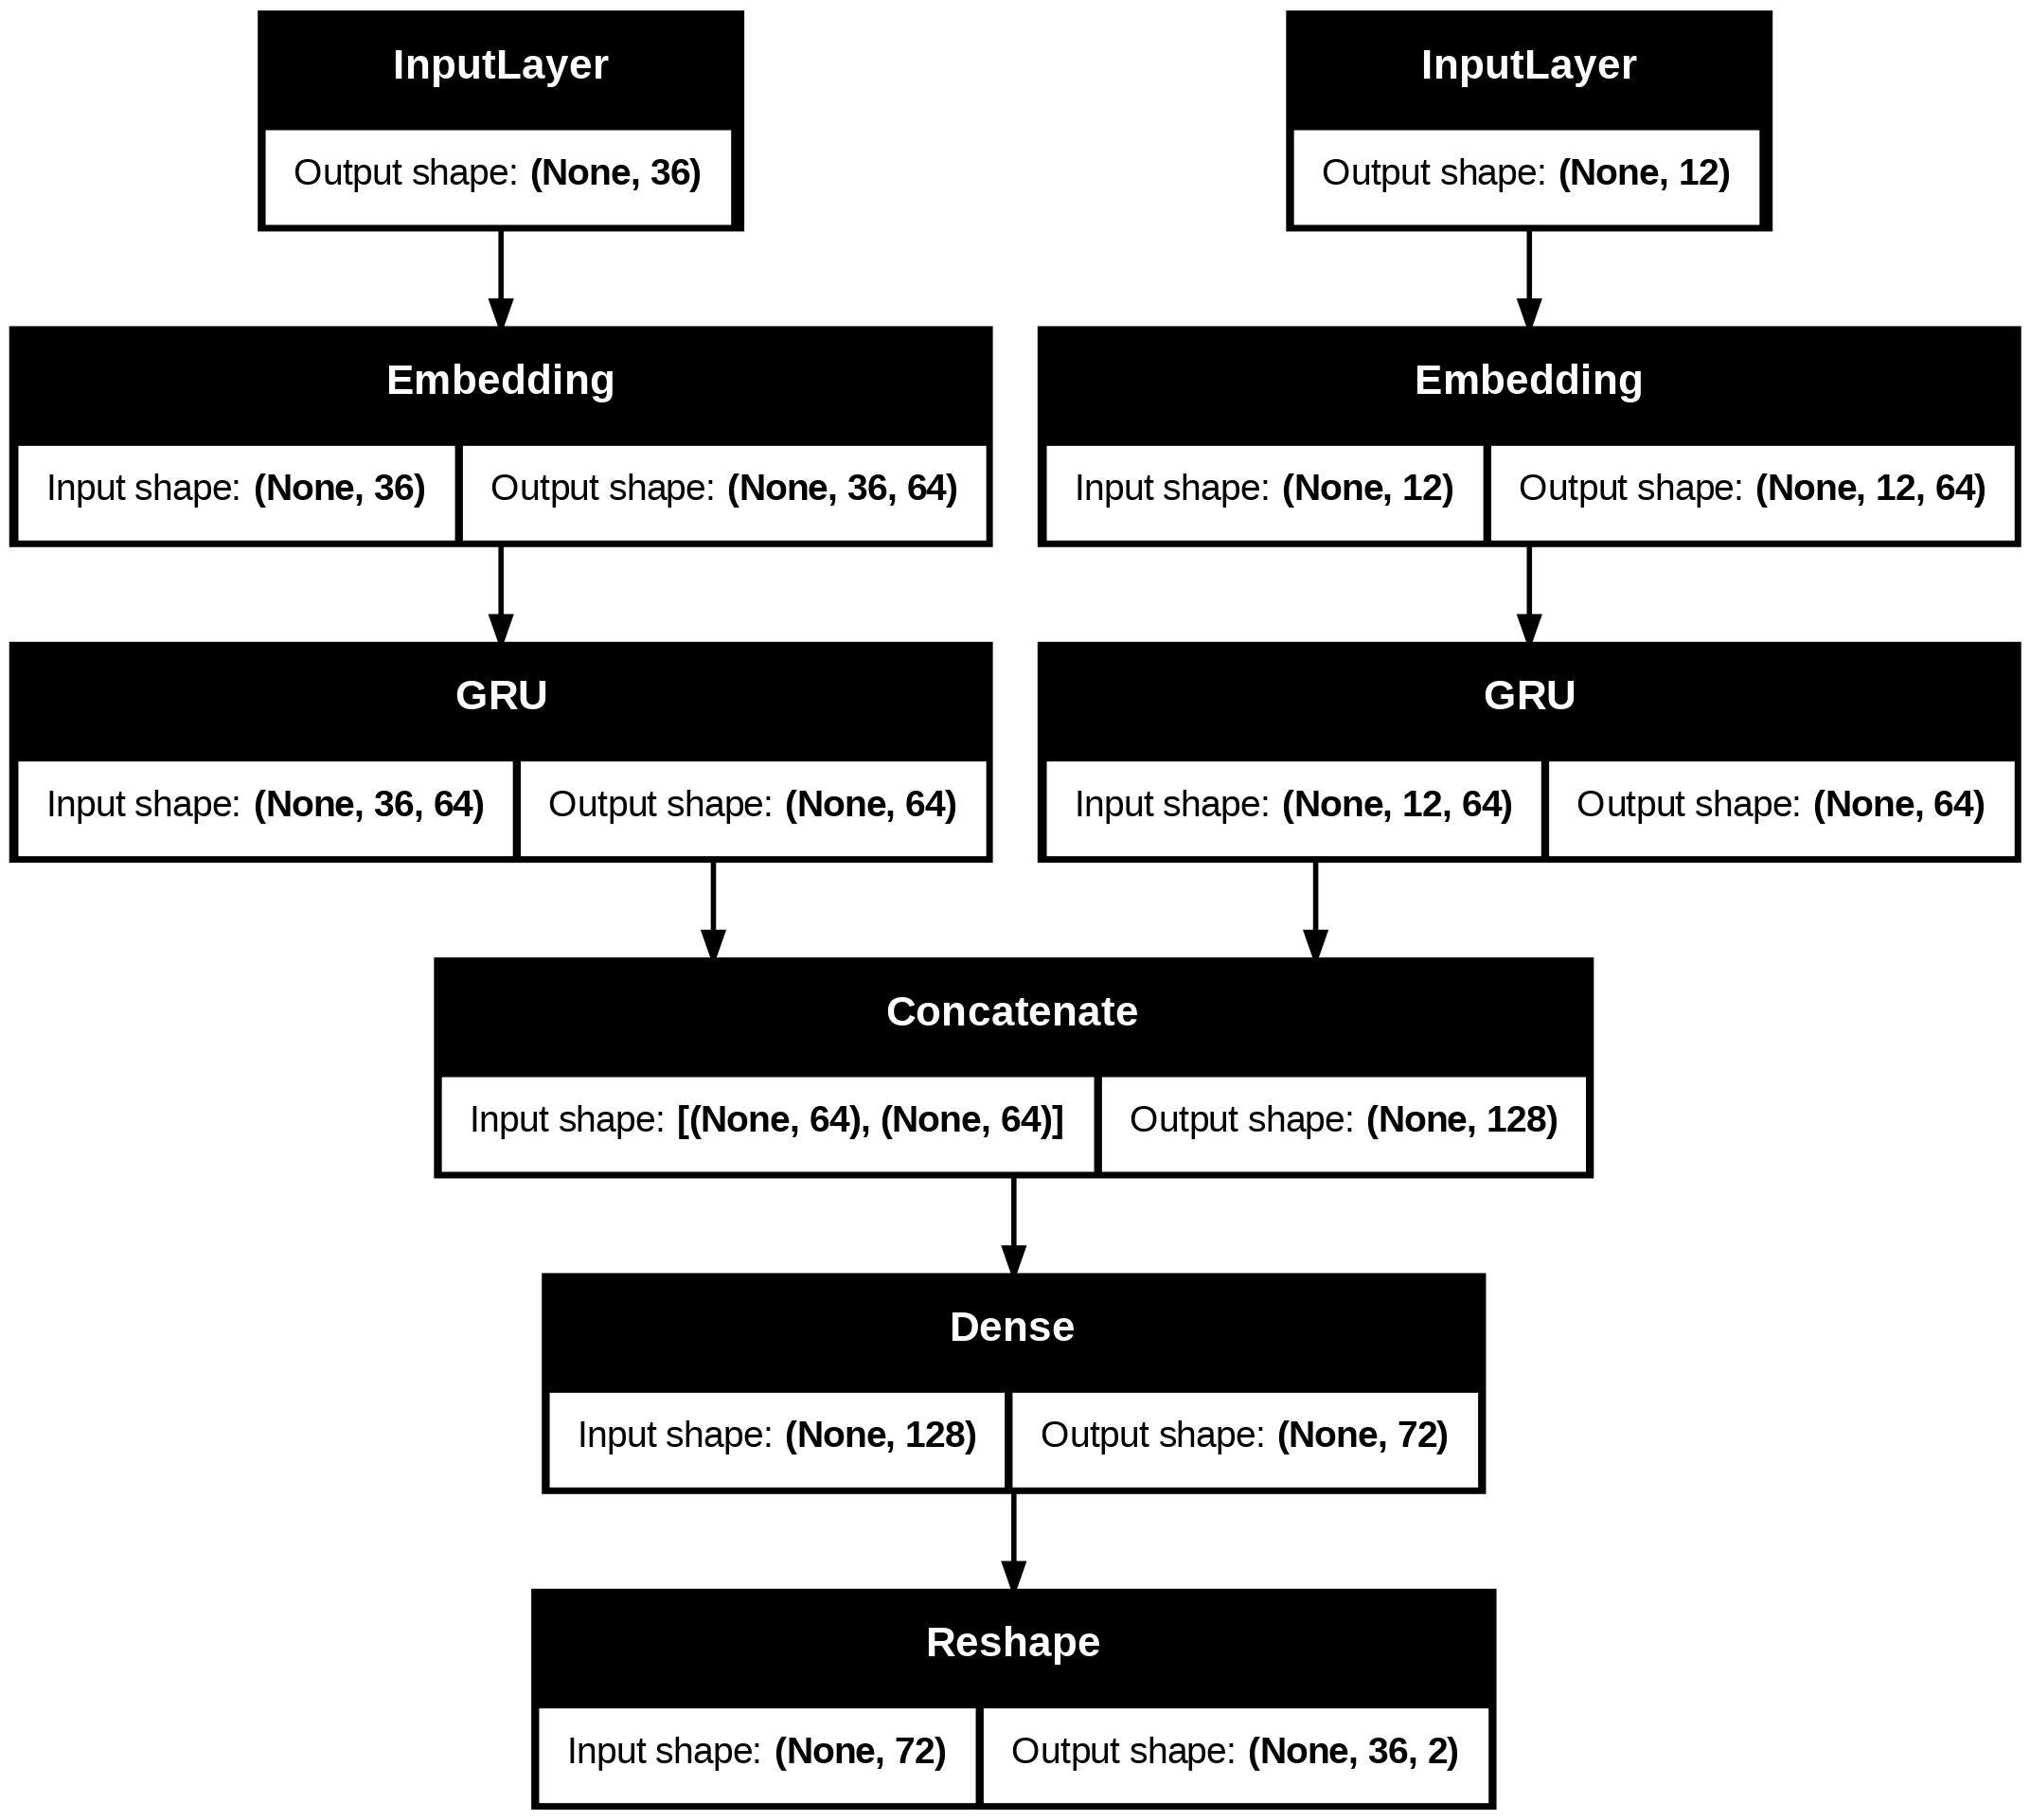

In [79]:
from tensorflow import keras
from tensorflow.keras import layers as L

EMBED_DIM = 64
N_REC = 64

# 1. Input Layers
context_inp = L.Input(shape=(context_train.shape[1],), name='context')
question_inp = L.Input(shape=(question_train.shape[1],), name='question')

# 2. Embedding Layers
context_emb = L.Embedding(len(context_tokenizer.word_index) + 1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index) + 1, EMBED_DIM, name='question_embeddings')(question_inp)

# 3. GRU Layers
context_gru = L.GRU(N_REC, return_sequences=False, name='context_gru')(context_emb)
question_gru = L.GRU(N_REC, return_sequences=False, name='question_gru')(question_emb)


# 4. Concatenation and Dense Layer
merged = L.concatenate([context_gru, question_gru], axis=1, name='merged')
outputs = L.Dense(ans_vec_train.shape[1] * ans_vec_train.shape[2], activation='sigmoid', name='outputs')(merged)
outputs = L.Reshape((ans_vec_train.shape[1], ans_vec_train.shape[2]))(outputs)

# 5. Create and Compile Model
model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))

# 6. Model Summary and Plot
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [81]:
history = model.fit(
    [context_train, question_train],
    ans_vec_train,
    epochs=25,
    callbacks=[es, rlp]
)

Epoch 1/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.1246 - learning_rate: 1.0000e-04
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


656/656 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - loss: 0.0795 - learning_rate: 1.0000e-04
Epoch 3/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - loss: 0.0786 - learning_rate: 1.0000e-04
Epoch 4/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 0.0779 - learning_rate: 1.0000e-04
Epoch 5/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - loss: 0.0770 - learning_rate: 1.0000e-04
Epoch 6/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - loss: 0.0722 - learning_rate: 1.0000e-04
Epoch 7/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - loss: 0.0649 - learning_rate: 1.0000e-04
Epoch 8/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - loss: 0.0636 - learning_rate: 1.0000e-04
Epoch 9/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 0.0622 - learning_rate: 1.0000e-04
Epoch 10/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - loss: 0.0615 - learning_rate: 1.0000e-04
Epoch 11/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 0.0588 - learning_rate: 1.0000e-04
Epoch 12/25
656/656 ━━━━━━━━━━━━━━━━━━━

In [82]:
idx = 28
query_context = context_valid[idx:idx+1]
query_question = question_valid[idx:idx+1]
query_ans_vec = ans_vec_valid[idx:idx+1]
query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does
print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

NameError: name 'context_valid' is not defined

Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [86]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)


Your custom context goes here.The Google Colaboratory, or "Colab" for short, is a free cloud service that allows you to write and execute Python code in your web browser. It is particularly well-suited to machine learning, data analysis, and education. Colab is a hosted Jupyter notebook service that requires no setup to use.
Your custom question goes here.What is Google Colab


ValueError: Input 1 of layer "functional_6" is incompatible with the layer: expected shape=(None, 12), found shape=(1, 36)

# <font color='#4879E2'>More resources</font>

Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Compulsory Task

Look into how Name Entity Recognition and Parts of Speech Tagging work and show your research for the same.

Gotcha! Let’s make this feel way more natural, like we’re just chatting about it.  

So, Named Entity Recognition (NER) is basically a way for computers to pick out important stuff in a sentence—like names of people, places, companies, dates, or even products. Imagine you have a sentence like, **"Elon Musk founded SpaceX in California in 2002."** NER would go:  

- **"Elon Musk" → Person**  
- **"SpaceX" → Organization**  
- **"California" → Location**  
- **"2002" → Date**  

This is super useful for things like chatbots, search engines, or news summarization because it helps machines actually **understand** what a text is talking about instead of just treating it like a bunch of words.  

Now, how does NER do this? Well, it usually works in two ways:  

1. **Rule-based systems**, which rely on predefined patterns and dictionaries (like "New York" always being a place).  
2. **Machine learning models**, where you feed a computer tons of labeled text, and it learns patterns to figure out what’s what.  

Okay, now onto **Part-of-Speech (POS) Tagging**—this is just a fancy way of saying **labeling words based on their role in a sentence**. So if you take the sentence:  

**"The cat sat on the mat."**  

A POS tagger would mark them like this:  

- **The (Determiner)**  
- **Cat (Noun)**  
- **Sat (Verb)**  
- **On (Preposition)**  
- **The (Determiner)**  
- **Mat (Noun)**  

Basically, it helps a computer understand grammar and sentence structure. Without POS tagging, a model might get confused between words like **"book"** (as in a novel) and **"book"** (as in booking a ticket).  

How does it work? Again, there are **rule-based** methods (which follow strict grammar rules) and **machine learning-based** methods (where a model is trained to recognize patterns in real text). Nowadays, deep learning models like transformers (think GPT) have made these tasks much more accurate.  

So, in short—NER helps computers **spot important names and terms**, while POS tagging helps them **understand grammar** so they don’t just mash words together randomly. Both are key in making NLP models, like chatbots and translation tools, sound more natural.  

Hope that makes sense! Let me know if you want me to break it down even further. 😊